# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [156]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
# income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)
income = pd.read_csv("income.csv.zip", index_col=0)
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [10]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

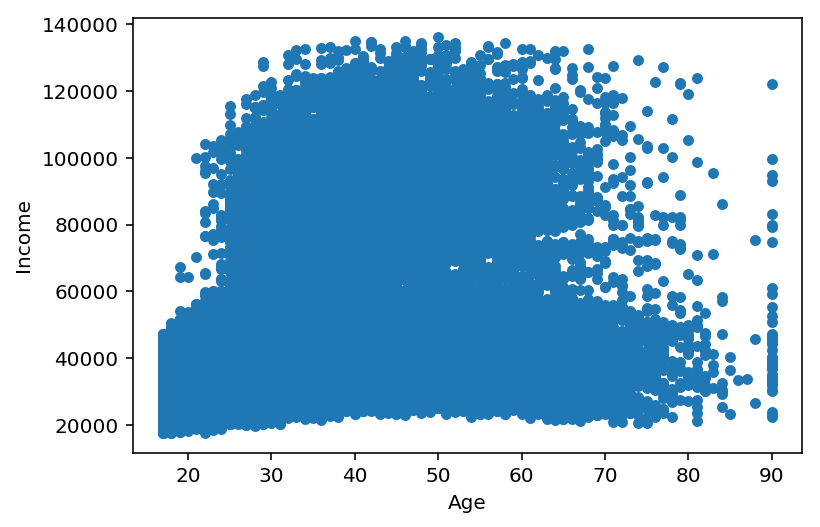

In [157]:
income.plot(x='Age', y='Income', kind='scatter')

# Cuál es la relación entre Income y Age :
# Respuesta: 
Al observar la gráfica se observa que los puntos son dispersos por lo cual se puede concluir que cualquier linea que pase por el conjunto de puntos es valida para una regresión lineal.


In [158]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [159]:
X=income.Age
y=income.Income
X.shape[0]

32561

## Normalize data

## $$ x = \frac{x -\overline x}{\sigma_x} $$ 

In [86]:
#y_mean, y_std = y.mean(), y.std()
#X_mean, X_std = X.mean(), X.std()

#y = (y - y_mean)/ y_std
#X = (X - X_mean)/ X_std


## Form of linear regression

## $$h_\beta(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

- $h_\beta(x)$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In [160]:
X_inc=income.Age*(1)
X_inc=np.c_[np.ones(X_inc.shape[0]),X_inc]
X_inc[0:5]

array([[ 1., 39.],
       [ 1., 50.],
       [ 1., 38.],
       [ 1., 53.],
       [ 1., 28.]])

In [161]:
beta = np.dot(np.linalg.inv(np.dot(X_inc.T, X_inc)),np.dot(X_inc.T, y))
print('betas:',beta)

betas: [32538.08813087   542.16765707]


Ahora incluyendo un aumento del uno por ciento en la edad, ¿cuánto aumentan los ingresos?

In [162]:
X_inc=income.Age*(1+0.01)
X_inc=np.c_[np.ones(X_inc.shape[0]),X_inc]
X_inc[0:5]

array([[ 1.  , 39.39],
       [ 1.  , 50.5 ],
       [ 1.  , 38.38],
       [ 1.  , 53.53],
       [ 1.  , 28.28]])

In [163]:
beta = np.dot(np.linalg.inv(np.dot(X_inc.T, X_inc)),np.dot(X_inc.T, y))
print('betas:',beta)

betas: [32538.08813087   536.79966047]


Al incluir un incremento en la edad de 1% (0.01) el coeficiente para la edad disminuye aproximadamente en 5 unidades, pasa de 542.16 a 536.79

# Estimación de la regresión con sklearn

Se normaliza la variable dependiente (ingreso) e independiente (edad)

In [138]:
#y_mean, y_std = y.mean(), y.std()
#X_mean, X_std = X.mean(), X.std()

#y = (y - y_mean)/ y_std
#X = (X - X_mean)/ X_std

#plt.scatter(X, y)
#plt.xlabel('Age')
#plt.ylabel('Income')

In [164]:
# import:sklearn se llama la libreria
from sklearn.linear_model import LinearRegression

In [165]:
# Initialize
linreg = LinearRegression(fit_intercept=False)

X[0:5]Se genera una columna compuesta por [1 , X(0)], donde el uno se obtiene con la función np.ones y tiene la dimensión de X

Se genera una columna compuesta por [1 , X(0)], donde el uno se obtiene con la función np.ones y tiene la dimensión de X

In [167]:
# create X and y
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]
print(X_[0:5])

[[ 1. 39.]
 [ 1. 50.]
 [ 1. 38.]
 [ 1. 53.]
 [ 1. 28.]]


In [168]:
linreg.fit(X_, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [169]:
linreg.coef_

array([32538.08813087,   542.16765707])

El comando np.c concatena los valores del primer atributo con el segundo. Si tiene un solo parentesis muestra el vector por fila, si tiene doble parentesis genera un vector fila. ej: np.c[np.array([1,2,3]), np.array([4,5,6])] array([[1, 4], [2, 5], [3, 6]]) np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])] array([[1, 2, 3, 0, 0, 4, 5, 6]])

# Ahora procedemos a realizar la predicción para el caso cuando la edad es de 30 años y 40 años respectivamente

In [173]:
x_anos=np.c_[np.ones(2),[30,40]]
print (x_anos)

[[ 1. 30.]
 [ 1. 40.]]


In [174]:
#x_anos.reshape(1,-1)

In [175]:
y_p1=linreg.predict(x_anos.reshape(2, -1))
print('incomes:',y_p1)

incomes: [48803.11784304 54224.79441376]


# Exercise 4.2
Evaluate the model using the MSE

In [36]:
X_pre=np.c_[np.ones(X.shape),X]
X_pre[0:5]

array([[ 1., 39.],
       [ 1., 50.],
       [ 1., 38.],
       [ 1., 53.],
       [ 1., 28.]])

In [37]:
from sklearn import metrics
y_predTotal=linreg.predict(X_pre)
y_predTotal
print('MSE:', metrics.mean_squared_error(y, y_predTotal))

MSE: 593783043.8402297


Con el cálculo del MSE, al obteniendo un valor tan alto, se confirma que no hay una relación estrechamente lineal entre la edad y el ingreso.


# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [176]:
beta_age=np.dot(np.linalg.inv(np.dot(X_.T,X_)),np.dot(X_.T,y))

In [177]:
print('betas:',beta_age)

betas: [32538.08813087   542.16765707]


Age y Age$^2$ como característica. Se eleva la variable Age al cuadrado, también se puede usar la opción 
 X_2=np.power(X,2)

In [236]:
X_2=X**2
#X_2=np.power(X,2)
X_2[0:5]

0    1521
1    2500
2    1444
3    2809
4     784
Name: Age, dtype: int64

Se genera un array x_n compuesto por Age y Age$^2$ $$y=\beta_0+\beta_1x + \beta_2x^2$$

In [237]:
x_n=np.c_[X , X_2]
x_n[0:5]

array([[  39, 1521],
       [  50, 2500],
       [  38, 1444],
       [  53, 2809],
       [  28,  784]])

In [238]:
x_n = np.c_[np.ones(n_samples), x_n]
x_n[0:5]

array([[1.000e+00, 3.900e+01, 1.521e+03],
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 3.800e+01, 1.444e+03],
       [1.000e+00, 5.300e+01, 2.809e+03],
       [1.000e+00, 2.800e+01, 7.840e+02]])

In [239]:
beta_age2=np.dot(np.linalg.inv(np.dot(x_n.T,x_n)),np.dot(x_n.T,y))

In [240]:
print('betas:',beta_age2)

betas: [-16225.07097408   3131.77014151    -30.54341041]


Ahora calculamos para 30 años y 40 años la función:

In [241]:
x_anos2=np.c_[x_anos,[30**2,40**2]]
x_anos2
linreg.fit(x_n, y)
print('betas:',linreg.coef_)
y_p1=linreg.predict(x_anos2.reshape(2, -1))
print('incomes:',y_p1)

betas: [-16225.07097408   3131.77014151    -30.54341041]
incomes: [50238.96390027 60176.27802692]


# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [242]:
X_3=income.fnlwgt
#print(X.shape)
#print(X_2.shape)
#print(X_3.shape)
x_n2=np.c_[X , X_2, X_3]
x_n2[0:5]

array([[    39,   1521,  77516],
       [    50,   2500,  83311],
       [    38,   1444, 215646],
       [    53,   2809, 234721],
       [    28,    784, 338409]])

In [243]:
x_n2 = np.c_[np.ones(n_samples), x_n2]
x_n2[0:5]

array([[1.00000e+00, 3.90000e+01, 1.52100e+03, 7.75160e+04],
       [1.00000e+00, 5.00000e+01, 2.50000e+03, 8.33110e+04],
       [1.00000e+00, 3.80000e+01, 1.44400e+03, 2.15646e+05],
       [1.00000e+00, 5.30000e+01, 2.80900e+03, 2.34721e+05],
       [1.00000e+00, 2.80000e+01, 7.84000e+02, 3.38409e+05]])

In [245]:
beta_varios=np.dot(np.linalg.inv(np.dot(x_n2.T,x_n2)),np.dot(x_n2.T,y))
beta_varios

array([-1.66304509e+04,  3.13295047e+03, -3.05440300e+01,  1.90157799e-03])

Los betas de este nuevo modelo se mantienen similares a los betas del modelo anterior, sin embargo, el nuevo beta arroja un valor pequeño en el orden de los 0,001

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [53]:
# Download the dataset
#data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')
data = pd.read_csv('churn.csv')

In [54]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [55]:
#data['CustServ Calls'].min()
data.loc[3332]

State                   TN
Account Length          74
Area Code              415
Phone             400-4344
Int'l Plan              no
VMail Plan             yes
VMail Message           25
Day Mins             234.4
Day Calls              113
Day Charge           39.85
Eve Mins             265.9
Eve Calls               82
Eve Charge            22.6
Night Mins           241.4
Night Calls             77
Night Charge         10.86
Intl Mins             13.7
Intl Calls               4
Intl Charge            3.7
CustServ Calls           0
Churn?              False.
Name: 3332, dtype: object

# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


In [56]:
#Partir en orden
#X=data['Day Mins']
X=data['CustServ Calls']
X.shape

(3333,)

#Se usa la opción numpy.where donde compara el valor que tiene la columna Churn?, y si esta es True le asigna 1, en caso contrario 0

In [57]:
#Y=pd.get_dummies(data['Churn?'], drop_first=True)
Y = np.where(data['Churn?']=='True.', 1, 0)
print(Y[0:22])
print(X[0:22])

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1]
0     1
1     1
2     0
3     2
4     3
5     0
6     3
7     0
8     1
9     0
10    4
11    0
12    1
13    3
14    4
15    4
16    1
17    3
18    1
19    1
20    0
21    5
Name: CustServ Calls, dtype: int64


Se obtiene el 70% de los datos a partir de la función shape y multiplicando por 0.7, como es posible que se obtenga un número con decimales se usa la función int para aproximarlo al entero más cercano.

In [59]:
pos=X.shape[0]*0.7
pos=int(pos)


los x_train, Y_train se toman desde la posición cero hasta pos, donde la última posición es pos-1

In [60]:
#Selección del 70% de datos para el train en X
X_train=X[0:pos]
#Selección del 70% de datos para el train en Y
Y_train=Y[0:pos]
X_train.shape

(2333,)

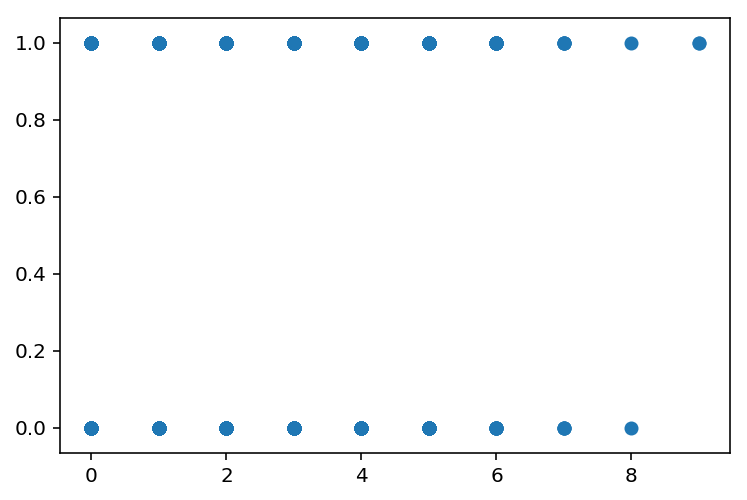

In [61]:
plt.scatter(X, Y)

Los X_test, Y_test se toman desde posición hasta el final

In [63]:
X_test=X[pos:]
Y_test=Y[pos:]
Y_test.shape

(1000,)

Volver a x_train y test en un array de dos columnas

In [64]:
X_train=np.c_[np.ones(X_train.shape[0]), X_train]
X_test=np.c_[np.ones(X_test.shape[0]), X_test]

In [65]:

X_train.shape

(2333, 2)

In [66]:
Y_train.shape

(2333,)

# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [67]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
#logreg = LogisticRegression(solver='newton-cg',C=1e9)
logreg.fit(X_train, Y_train)
Y_pred=logreg.predict(X_test)
print(Y_pred[0:100])
print(Y_test[0:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0
 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1]


Text(0,0.5,'Churns?')

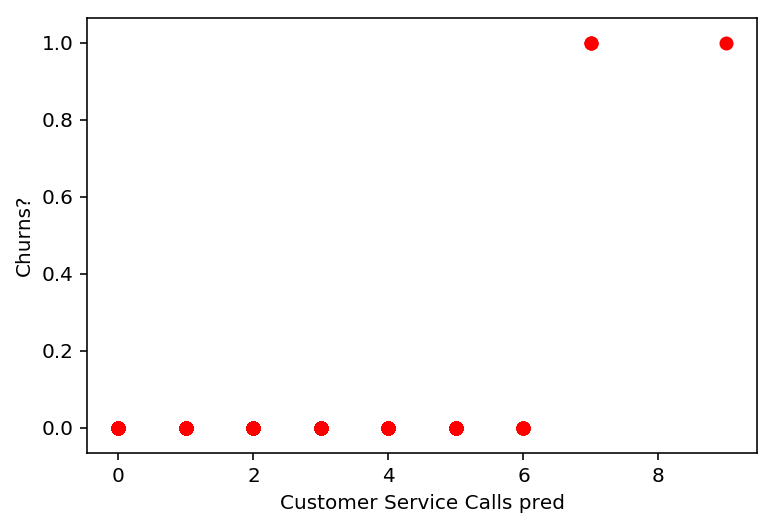

In [68]:
plt.scatter(X_test[:,1], Y_pred[:], color='red')
plt.xlabel('Customer Service Calls pred')
plt.ylabel('Churns?')

Text(0,0.5,'Churns?')

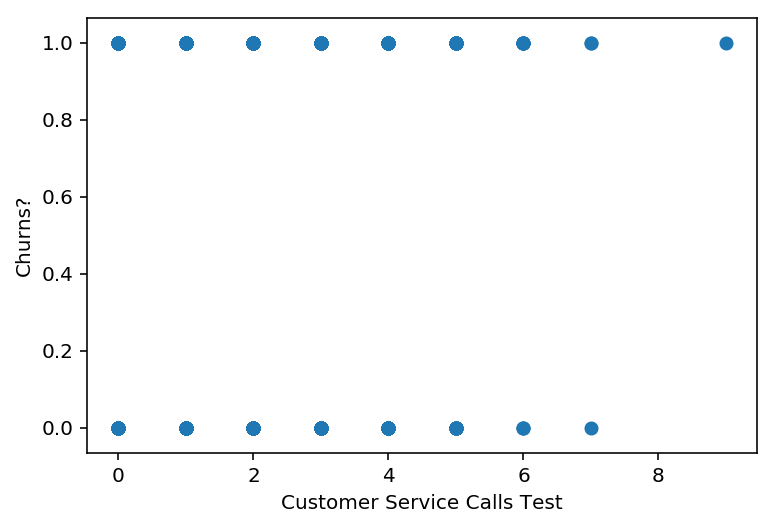

In [69]:
plt.scatter(X_test[:,1], Y_test[:])
#plt.plot(X_test, Y_pred, color='green')
#plt.plot(X_test, Y_test, color='red')
plt.xlabel('Customer Service Calls Test')
plt.ylabel('Churns?')

In [71]:
Y_pred_prob= logreg.predict_proba(X_test)
Y_pred_prob.shape

(1000, 2)

Text(0,0.5,'Churns?')

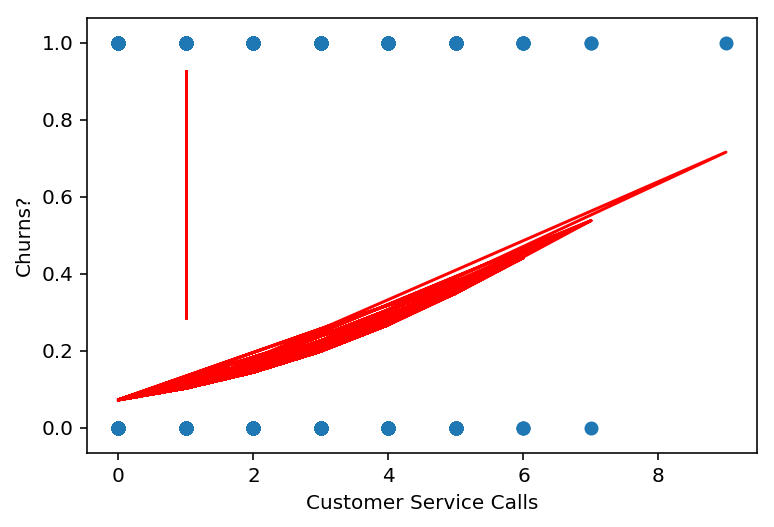

In [72]:
#plt.scatter(X_test, Y_pred_prob, color='green')
plt.scatter(X_test[:,1], Y_test[:])
#plt.plot(X_test, Y_pred, color='green')
plt.plot(X_test, Y_pred_prob, color='red')
plt.xlabel('Customer Service Calls')
plt.ylabel('Churns?')

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [73]:
print(Y_test.shape)
print(Y_pred.shape)
metrics.confusion_matrix(Y_test, Y_pred, labels=None, sample_weight=None)

(1000,)
(1000,)


array([[830,   1],
       [166,   3]])

Con la matriz de confusión se busca analizar el desempeño del modelo.

$$\textrm{Accuracy} = \frac{\textrm{TP + TN} }{\textrm{TP + TN + FP + FN}} $$

In [74]:
accuracy=(830+3)/(830+3+1+166)
accuracy

0.833

Se concluye que el 83.3% de las llamadas quedaron clasificadas correctamente dentro del modelo.